In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import os

In [49]:
data=pd.read_csv('./student-mat.csv')

In [50]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
columns=data.columns
for column in columns:
    if (not str(data[column].dtype).startswith("int")):
        print("Column name is {} type is {}".format(column,data[column].dtype))
        print("Unique values in that column is {}".format(data[column].unique()))
        values=data[column].unique()
        a=zip(values,range(len(values)))
        a=dict(a)
        l=[]
        l1=[]
        for i in data[column]:
            l.append(i)
        for i in l:
            i=a.get(i)
            l1.append(i)
        data[column]=l1
    

Column name is school type is object
Unique values in that column is ['GP' 'MS']
Column name is sex type is object
Unique values in that column is ['F' 'M']
Column name is address type is object
Unique values in that column is ['U' 'R']
Column name is famsize type is object
Unique values in that column is ['GT3' 'LE3']
Column name is Pstatus type is object
Unique values in that column is ['A' 'T']
Column name is Mjob type is object
Unique values in that column is ['at_home' 'health' 'other' 'services' 'teacher']
Column name is Fjob type is object
Unique values in that column is ['teacher' 'other' 'services' 'health' 'at_home']
Column name is reason type is object
Unique values in that column is ['course' 'other' 'home' 'reputation']
Column name is guardian type is object
Unique values in that column is ['mother' 'father' 'other']
Column name is schoolsup type is object
Unique values in that column is ['yes' 'no']
Column name is famsup type is object
Unique values in that column is ['no

In [52]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,0,1,1,1,2,1,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,1,1,3,2,3,1,...,4,4,1,3,4,5,0,11,12,10


In [53]:
print(data.shape)

(395, 33)


In [54]:
l2=[]
l3=[]
for i,j,k in zip(data['G1'],data['G2'],data['G3']):
    l2.append([i,j,k])
for i in l2:
    l3.append(sorted(i))
l4=[]
for i in l3:
    l4.append((i[1]+i[2])//2)
data['Average_marks']=l4

In [55]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_marks
0,0,0,18,0,0,0,4,4,0,0,...,3,4,1,1,3,6,5,6,6,6
1,0,0,17,0,0,1,1,1,0,1,...,3,3,1,1,3,4,5,5,6,5
2,0,0,15,0,1,1,1,1,0,1,...,3,2,2,3,3,10,7,8,10,9
3,0,0,15,0,0,1,4,2,1,2,...,2,2,1,1,5,2,15,14,15,15
4,0,0,16,0,0,1,3,3,2,1,...,3,2,1,2,5,4,6,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,5,4,4,5,4,11,9,9,9,9
391,1,1,17,0,1,1,3,1,3,2,...,4,5,3,4,2,3,14,16,16,16
392,1,1,21,1,0,1,1,1,2,1,...,5,3,3,3,3,3,10,8,7,9
393,1,1,18,1,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,11


In [57]:
training_features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'G1', 'G2','G3']
label_feature = ['Average_marks']
selected_feature_data = data

In [58]:
m=data.shape[0]
n=len(training_features)
percnt_trainig=80
num_train_exp=int((percnt_trainig*m)/100)
num_test_exp=m-num_train_exp
print('number_example_in_training',num_train_exp)
print('number_example_in_test', num_test_exp)

number_example_in_training 316
number_example_in_test 79


In [95]:
selected_feature_data.sample(frac=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average_marks
123,0,1,16,0,0,1,4,4,1,1,...,4,4,1,4,5,18,14,11,13,13
336,0,0,19,1,0,0,3,1,3,4,...,4,3,1,2,5,12,14,13,13,13
384,1,1,18,1,0,1,4,2,2,1,...,4,3,4,3,3,14,6,5,5,5
200,0,0,16,0,0,1,4,3,1,1,...,3,5,1,5,2,2,16,16,16,16
129,0,1,16,1,0,1,4,4,4,0,...,5,5,2,5,4,8,18,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0,1,17,0,0,1,3,3,2,1,...,3,4,1,4,4,4,6,5,6,6
6,0,1,16,0,1,1,2,2,2,1,...,4,4,1,1,3,0,12,12,11,12
77,0,0,16,0,0,1,2,2,2,1,...,2,3,1,3,3,0,11,11,11,11
232,0,1,17,0,0,1,4,4,4,0,...,5,5,1,3,2,14,11,9,9,10


In [60]:
training_data_features=selected_feature_data.head(num_train_exp)[training_features]

In [61]:
training_data_labels=selected_feature_data.head(num_train_exp)[label_feature]

In [96]:
test_data_features = selected_feature_data.tail(num_test_exp)[training_features]
test_data_labels = selected_feature_data.tail(num_test_exp)[label_feature]

In [63]:
print('shape of traing data features', training_data_features.shape)
print('shape of traing data labels', training_data_labels.shape)
print('shape of test data features', test_data_features.shape)
print('shape of test data features', test_data_labels.shape)

shape of traing data features (316, 33)
shape of traing data labels (316, 1)
shape of test data features (79, 33)
shape of test data features (79, 1)


In [74]:
model=keras.models.Sequential()
model.add(Dense(19,activation='relu',input_shape=(training_data_features.shape[1],)))
model.add(Dense(13,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='relu'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 19)                646       
_________________________________________________________________
dense_12 (Dense)             (None, 13)                260       
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 1,012
Trainable params: 1,012
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])

In [80]:
history=model.fit(training_data_features,training_data_labels,epochs=1000,validation_split=0.2)

1075 - mae: 0.2531 - val_loss: 0.4749 - val_mae: 0.5522
Epoch 856/1000
252/252 [==============================] - 0s 63us/step - loss: 0.2062 - mae: 0.3789 - val_loss: 0.3859 - val_mae: 0.4938
Epoch 857/1000
252/252 [==============================] - 0s 59us/step - loss: 0.0616 - mae: 0.1947 - val_loss: 0.2861 - val_mae: 0.4480
Epoch 858/1000
252/252 [==============================] - 0s 62us/step - loss: 0.2014 - mae: 0.3728 - val_loss: 0.2395 - val_mae: 0.4089
Epoch 859/1000
252/252 [==============================] - 0s 63us/step - loss: 0.0860 - mae: 0.2342 - val_loss: 0.3492 - val_mae: 0.4856
Epoch 860/1000
252/252 [==============================] - 0s 67us/step - loss: 0.1564 - mae: 0.3211 - val_loss: 0.4668 - val_mae: 0.5844
Epoch 861/1000
252/252 [==============================] - 0s 63us/step - loss: 0.1289 - mae: 0.2741 - val_loss: 0.3036 - val_mae: 0.4381
Epoch 862/1000
252/252 [==============================] - 0s 63us/step - loss: 0.2066 - mae: 0.3896 - val_loss: 0.2866 - v

In [82]:

model.evaluate(test_data_features, test_data_labels, verbose=0)

[0.16607587001746213, 0.33002999424934387]

In [99]:
from sklearn.metrics import mean_squared_error

predicted_value = model.predict(test_data_features)
MSE = mean_squared_error(np.asmatrix(test_data_labels), predicted_value)
print("Mean Square Error ", MSE)
for i in range(0,10):
    print(predicted_value[i], "--", np.asmatrix(test_data_labels)[i])

Mean Square Error  0.16607586837850377
[6.916294] -- [[8]]
[9.184101] -- [[9]]
[11.140284] -- [[11]]
[11.154133] -- [[11]]
[12.711361] -- [[13]]
[10.574587] -- [[10]]
[11.047821] -- [[11]]
[14.050808] -- [[14]]
[15.505075] -- [[15]]
[10.943214] -- [[11]]


In [84]:
def train_val_by_metric(history,metric):
    history_dict = history.history
    values = history_dict[metric]
    val_values = history_dict['val_'+metric]

    epochs = range(1, len(values) + 1)
  
    plt.plot(epochs, values, 'bo', label= 'Training '+metric)
    plt.plot(epochs, val_values, 'b', label= 'Validation '+metric)
    metricTitle = 'Loss' if metric == 'loss' else 'Accuracy'
    plt.title('Training and validation '+metricTitle)
    plt.xlabel('Epochs')
    plt.ylabel(metricTitle)
    plt.legend()

    plt.show()
def train_val_res(history):
    train_val_by_metric(history,'loss')
    train_val_by_metric(history,'accuracy')

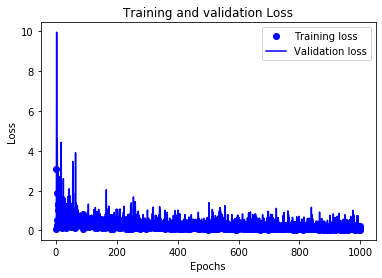

In [85]:
train_val_by_metric(history,'loss')